In [ ]:
pip install openai==0.28

In [4]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.8 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/s

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

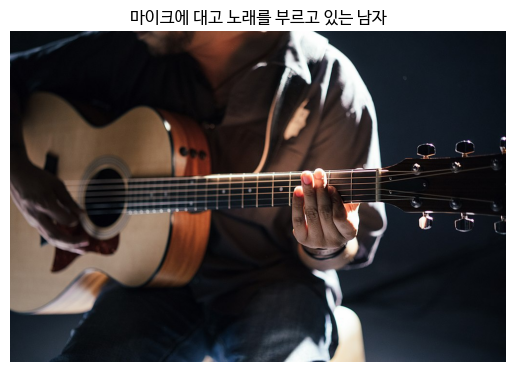

In [2]:
import os
import random
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 폴더 경로 설정
folder_path = '/content/drive/MyDrive/sample_data_image2'
folder_path_json = '/content/drive/MyDrive/sample_data_image2_json'

# 해당 폴더 내의 모든 파일 목록 가져오기
file_list = os.listdir(folder_path)
file_list_json = os.listdir(folder_path_json)

# 지정된 형식에 맞는 파일만 필터링
filtered_files = [file for file in file_list if file.endswith('.jpg') and file.startswith('110100')]

# 랜덤하게 하나의 파일 선택
selected_image_file = random.choice(filtered_files)

# 이미지 파일 경로
image_path = os.path.join(folder_path, selected_image_file)

# 동일한 이름의 JSON 파일 찾기
json_file = selected_image_file.replace('.jpg', '.json')

# JSON 파일 경로
json_path = os.path.join(folder_path_json, json_file)

# JSON 파일 읽기
with open(json_path, 'r') as file:
    data = json.load(file)

# 캡션 추출
caption = data.get('caption', 'No caption available')

# 이미지 로드 및 출력
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.title(caption)  # 캡션을 이미지 위에 출력
plt.show()

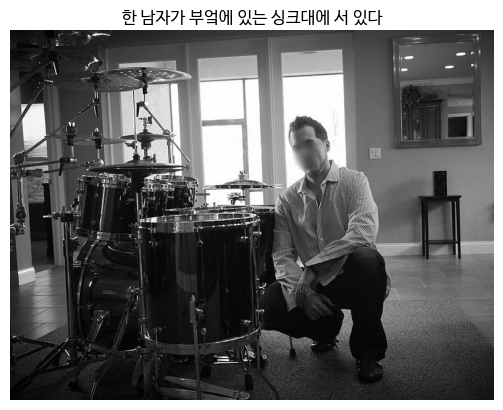

In [43]:
# 랜덤하게 하나의 파일 선택
selected_image_file = random.choice(filtered_files)

# 이미지 파일 경로
image_path = os.path.join(folder_path, selected_image_file)

# 동일한 이름의 JSON 파일 찾기
json_file = selected_image_file.replace('.jpg', '.json')

# JSON 파일 경로
json_path = os.path.join(folder_path_json, json_file)

# JSON 파일 읽기
with open(json_path, 'r') as file:
    data = json.load(file)

# 캡션 추출
caption = data.get('caption', 'No caption available')

# 이미지 로드 및 출력
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.title(caption)  # 캡션을 이미지 위에 출력
plt.show()

In [3]:
## 본인의 openai api 키 입력
OPENAI_API_KEY = 'sk-###'

In [ ]:
!pip install openai

In [4]:
import openai
import os
import time

openai.api_key  = OPENAI_API_KEY

In [5]:
def get_completion(prompt, model="gpt-3.5-turbo", temperature=0, verbose=False):
    messages = [{"role": "user", "content": prompt}]

    time_start = time.time()
    retry_count = 3
    for i in range(0, retry_count):
        while True:
            try:
                response = openai.ChatCompletion.create(
                    model=model,
                    messages=messages,
                    temperature=temperature, # this is the degree of randomness of the model's output
                )
                answer = response['choices'][0]['message']['content'].strip()
                tokens = response.usage.total_tokens


                time_end = time.time()

                if verbose:
                    print('prompt: %s | token: %d | %.1fsec\nanwer : %s'%(prompt, tokens, (time_end - time_start), answer))
                return answer

            except Exception as error:
                print(f"API Error: {error}")
                print(f"Retrying {i+1} time(s) in 4 seconds...")

                if i+1 == retry_count:
                    return prompt, None, None
                time.sleep(4)
                continue

In [46]:
prompt = f"""
To support students with lower literacy skills, I'm creating specialized questions.
Each question will focus on substituting a word from a provided sentence.
Both the correct answer and an incorrect alternative will be given.

Procedure for Creating Each Question:
1. Select a sentence.
2. Choose a key word from the sentence.
3. Identify a word that correctly substitutes the key word (Correct Answer).
4. Think of a word that is an incorrect substitute for the key word (Incorrect Answer).

For example:
Question 1:
Caption : "오래된 오토바이 한대가 해변에 주차되어있다.",
Key Word : "주차",
Correct : "정차",
Correct : "영차"

Create two questions in Python dictionary format using different key words from the following caption:
Caption: '''{caption}'''

"""
setquestion = get_completion(prompt, model="gpt-3.5-turbo")
print(setquestion)

Question 1:
{
  "Caption": "한 남자가 부엌에 있는 싱크대에 서 있다",
  "Key Word": "서",
  "Correct Answer": "서다",
  "Incorrect Answer": "걷다"
}

Question 2:
{
  "Caption": "한 남자가 부엌에 있는 싱크대에 서 있다",
  "Key Word": "부엌",
  "Correct Answer": "주방",
  "Incorrect Answer": "화장실"
}
